# FIR vs IIR Filters

Dalam modul ini, kita akan mempelajari konsep dasar dari **Impulse Response**, **Finite Impulse Response (FIR)**, dan **Infinite Impulse Response (IIR)** menggunakan bahasa pemrograman Python. Modul ini akan dibagi menjadi beberapa bagian agar lebih mudah dipahami.

## Sinyal Impuls

Pertama, kita perlu membuat sinyal impulse yang akan digunakan dalam filter kita. Sinyal impulse ini adalah sinyal pendek yang memiliki nilai '1' diikuti oleh nilai '0'. Sinyal ini digunakan untuk menguji bagaimana sistem merespons input yang sangat singkat.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, filtfilt

In [2]:
# Step 1: Create an impulse signal
impulse = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

`impulse` adalah daftar yang berisi satu nilai '1' diikuti oleh beberapa nilai '0'. Sinyal ini mewakili input yang sangat singkat atau impulsif yang akan digunakan untuk melihat bagaimana sistem merespons.

---
## Operasi Konvolusi

Sebelum kita melanjutkan, kita perlu memahami konsep dasar dari operasi konvolusi. Konvolusi adalah operasi matematika yang digunakan untuk menggabungkan dua fungsi menjadi satu fungsi. Dalam konteks ini, kita akan menggunakan konvolusi untuk menghitung respon sistem terhadap input.

`convolve` adalah fungsi yang menghitung konvolusi dari dua sinyal. Fungsi ini akan mengembalikan sinyal hasil konvolusi dari dua sinyal input.

**Ilustrasi Konvolusi**

![Ilustrasi Konvolusi](https://jinglescode.github.io/assets/img/posts/how-convolutional-layers-work-deep-learning-neural-networks-04.gif){: width="700px"}

Konvolusi dapat dituliskan dalam bentuk matematika sebagai berikut:

$$y[n] = \sum_{k=0}^{N-1} h[k] \cdot x[n-k]$$

Misalkan kita memiliki sinyal dan kernel (IR) sebagai berikut:

In [3]:
sinyal = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
kernel = [2, 3]

Maka operasinya adalah:

In [4]:
element_1 = sinyal[0] * kernel[0]
element_2 = sinyal[1] * kernel[0] + sinyal[0] * kernel[1]
print(f"element_1: {element_1}, element_2: {element_2}")
element_3 = sinyal[2] * kernel[0] + sinyal[1] * kernel[1]
print(f"element_3: {element_3}")

element_1: 2, element_2: 7
element_3: 12


Dengan menggunakan `np.convolve`, kita dapat menghitung hasil konvolusi dari kedua sinyal tersebut.

In [5]:
hasil_konvolusi = np.convolve(sinyal, kernel, mode='full')
print(hasil_konvolusi)

[ 2  7 12 17 22 27 32 37 42 47 30]


`np.convole`: Melakukan konvolusi dari dua array.

Parameter:
- `a` (array_like): Array input pertama.
- `v` (array_like): Array input kedua. Harus memiliki jumlah dimensi yang sama dengan `a`.
- `mode` (str, opsional): Menunjukkan ukuran output:
    - `'full'`: Output adalah konvolusi linier diskrit penuh dari input (default).
    - `'valid'`: Output hanya terdiri dari elemen-elemen yang tidak bergantung pada zero-padding.
    - `'same'`: Output memiliki ukuran yang sama dengan `a`, dipusatkan dengan output 'full'.

Return:
- `out` (ndarray): Konvolusi linier diskrit dari `a` dan `v`.

## FIR Filter (Manually)

Sekarang, kita akan mendefinisikan filter FIR (Finite Impulse Response). Filter ini mengambil input saat ini dan beberapa input sebelumnya dan mengkombinasikannya dengan bobot tertentu.

Untuk melakukan eksperimen ini, kita akan menggunakan sinyal ECG

In [6]:
import neurokit2 as nk
duration = 8  # seconds
sampling_rate = 1000  # Hz
ecg_signal = nk.ecg_simulate(
    duration=duration,
    sampling_rate=sampling_rate,
    heart_rate=65,
    noise=0.2,
    random_state=240925
    )

### Parameter Filter

In [7]:
nyquist_rate = sampling_rate / 2
low_cutoff = 0.8 / nyquist_rate  # Normalized frequency for low cutoff
high_cutoff = 2.0 / nyquist_rate  # Normalized frequency for high cutoff
filter_order = 101  # Order of the filter (Must be odd for Type-I FIR filter)

Kode ini mendefinisikan beberapa parameter penting untuk desain filter FIR (Finite Impulse Response):

- `nyquist_rate = sampling_rate / 2`: Menghitung frekuensi Nyquist, yang merupakan setengah dari sampling_rate. Frekuensi Nyquist adalah frekuensi tertinggi yang dapat direpresentasikan tanpa aliasing dalam sinyal digital.

- `low_cutoff = 0.8 / nyquist_rate`: Menghitung frekuensi cutoff rendah yang dinormalisasi. Frekuensi ini dinormalisasi terhadap frekuensi Nyquist.

- `high_cutoff = 2.2 / nyquist_rate`: Menghitung frekuensi cutoff tinggi yang dinormalisasi. Sama seperti low_cutoff, frekuensi ini juga dinormalisasi terhadap frekuensi Nyquist.

- `filter_order = 101`: Menentukan orde filter, yang harus ganjil untuk filter FIR tipe-I. Orde filter menentukan jumlah koefisien dalam filter dan mempengaruhi karakteristik frekuensi filter.

Parameter-parameter ini digunakan untuk mendesain filter FIR yang akan memproses sinyal digital.

### Proses Desain Filter Secara Manual

In [8]:
n = np.arange(filter_order)  # Sequence for generating coefficients
M = (filter_order - 1) // 2

# Calculate Ideal Impulse Response of Bandpass Filter
h_ideal = np.zeros(filter_order)
for i in range(filter_order):
    if i == M:
        h_ideal[i] = 2 * (high_cutoff - low_cutoff)  # Handle division by zero case
    else:
        h_ideal[i] = (
            np.sin(2 * np.pi * high_cutoff * (i - M)) / (np.pi * (i - M)) -
            np.sin(2 * np.pi * low_cutoff * (i - M)) / (np.pi * (i - M))
        )

# Apply window function
h = h_ideal * np.hamming(filter_order)

Kode ini menghasilkan koefisien filter menggunakan jendela Hamming untuk filter FIR (Finite Impulse Response):

1. `n = np.arange(filter_order)`: Membuat urutan angka dari 0 hingga [`filter_order - 1`] yang digunakan untuk menghasilkan koefisien filter.

2. `M = (filter_order - 1) // 2`: Menghitung nilai tengah dari urutan `n`yang digunakan sebagai pusat simetri untuk filter.

3. Menghitung Ideal Impulse Response dari Bandpass Filter:
    - `h_ideal = (np.sin(2 * np.pi * high_cutoff * (n - M)) / (np.pi * (n - M)) - np.sin(2 * np.pi * low_cutoff * (n - M)) / (np.pi * (n - M)))`: Menghitung respons impuls ideal untuk filter bandpass dengan mengurangi respons impuls low-pass dari high-pass.
    - `h_ideal[M] = 2 * (high_cutoff - low_cutoff)`: Mengganti nilai NaN di posisi [`M`] dengan nilai limit yang sesuai.

4. `h = h_ideal * np.hamming(filter_order)` : Menerapkan fungsi jendela Hamming pada respons impuls ideal untuk mendapatkan koefisien filter akhir.

Koefisien filter ini kemudian dapat digunakan untuk memfilter sinyal digital sesuai dengan spesifikasi bandpass yang diinginkan.

### Mencetak Kernel Filter

Berikut adalah kernel filter yang dihasilkan oleh kode di atas:

In [9]:
print("h_ideal", h_ideal)

h_ideal [0.00298767 0.00305364 0.00311871 0.00318288 0.00324611 0.00330838
 0.00336967 0.00342995 0.00348919 0.00354738 0.0036045  0.00366051
 0.0037154  0.00376914 0.00382172 0.00387311 0.00392329 0.00397225
 0.00401996 0.0040664  0.00411156 0.00415542 0.00419796 0.00423916
 0.00427901 0.0043175  0.00435459 0.0043903  0.00442458 0.00445744
 0.00448886 0.00451883 0.00454734 0.00457437 0.00459991 0.00462396
 0.0046465  0.00466753 0.00468703 0.004705   0.00472143 0.00473632
 0.00474966 0.00476144 0.00477166 0.00478031 0.00478739 0.00479291
 0.00479685 0.00479921 0.0048     0.00479921 0.00479685 0.00479291
 0.00478739 0.00478031 0.00477166 0.00476144 0.00474966 0.00473632
 0.00472143 0.004705   0.00468703 0.00466753 0.0046465  0.00462396
 0.00459991 0.00457437 0.00454734 0.00451883 0.00448886 0.00445744
 0.00442458 0.0043903  0.00435459 0.0043175  0.00427901 0.00423916
 0.00419796 0.00415542 0.00411156 0.0040664  0.00401996 0.00397225
 0.00392329 0.00387311 0.00382172 0.00376914 0.0037154

### Memfilter dan Melihat Hasil

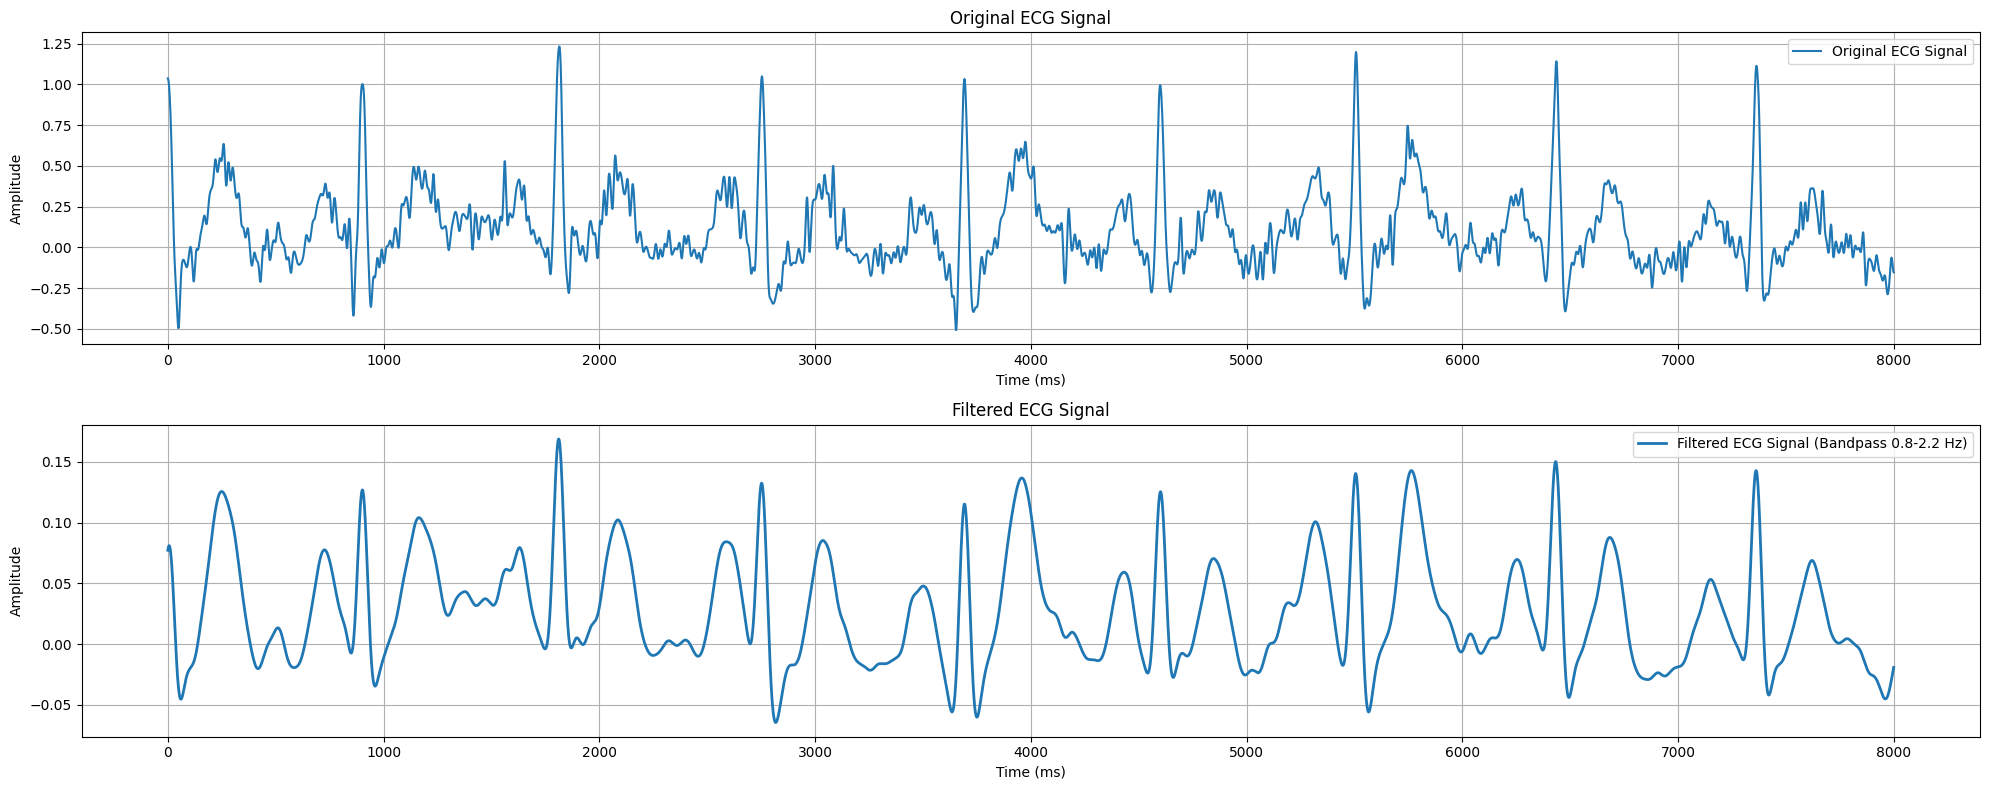

In [10]:
# Filter the signal using convolution
filtered_signal = np.convolve(ecg_signal, h, mode='same')

# Plotting the original and filtered signals
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))

# Plot original ECG signal
ax1.plot(ecg_signal, label="Original ECG Signal")
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Amplitude")
ax1.legend()
ax1.set_title("Original ECG Signal")
ax1.grid()

# Plot filtered ECG signal
ax2.plot(filtered_signal, label="Filtered ECG Signal (Bandpass 0.8-2.2 Hz)", linewidth=2)
ax2.set_xlabel("Time (ms)")
ax2.set_ylabel("Amplitude")
ax2.legend()
ax2.set_title("Filtered ECG Signal")
ax2.grid()
plt.tight_layout()
plt.show()

---
## FIR Filter (Using Scipy)

Selanjutnya kita akan menggunakan `scipy.signal` untuk mendesain filter FIR (Finite Impulse Response) yang sama. Dengan menggunakan `scipy.signal.firwin`, kita dapat dengan mudah mendesain filter FIR dengan spesifikasi yang diinginkan.

In [11]:
duration = 8  # seconds
sampling_rate = 1000  # Hz
ecg_signal = nk.ecg_simulate(
    duration=duration,
    sampling_rate=sampling_rate,
    heart_rate=65,
    noise=0.2,
    random_state=240925
    )

nyquist_rate = sampling_rate / 2
low_cutoff = 0.8 / nyquist_rate  # Normalized frequency for low cutoff
high_cutoff = 2.0 / nyquist_rate  # Normalized frequency for high cutoff
filter_order = 101  # Order of the filter (Must be odd for Type-I FIR filter)

### Proses Desain Filter Menggunakan Scipy

In [12]:
# Design the FIR filter using scipy.signal.firwin
fir_coefficients = firwin(filter_order, [low_cutoff, high_cutoff], pass_zero=False)

Penjelasan:

- `firwin`: Fungsi ini digunakan untuk mendesain filter FIR dengan koefisien yang dihasilkan berdasarkan jendela tertentu (dalam hal ini, jendela Hamming secara default).

- `filter_order`: Parameter ini menentukan orde filter, yaitu jumlah koefisien dalam filter. Orde filter mempengaruhi karakteristik frekuensi filter.

- `[low_cutoff, high_cutoff]`: Ini adalah daftar yang berisi frekuensi cutoff rendah dan tinggi yang dinormalisasi terhadap frekuensi Nyquist. Frekuensi ini menentukan rentang frekuensi yang akan dilewatkan oleh filter.

- `pass_zero=False`: Parameter ini menunjukkan bahwa filter yang didesain adalah filter bandpass, bukan low-pass atau high-pass. Dengan pass_zero=False, filter akan melewatkan frekuensi dalam rentang yang ditentukan oleh low_cutoff dan high_cutoff.

### Menerapkan Filter pada Sinyal dan Memvisualisasikan Hasil

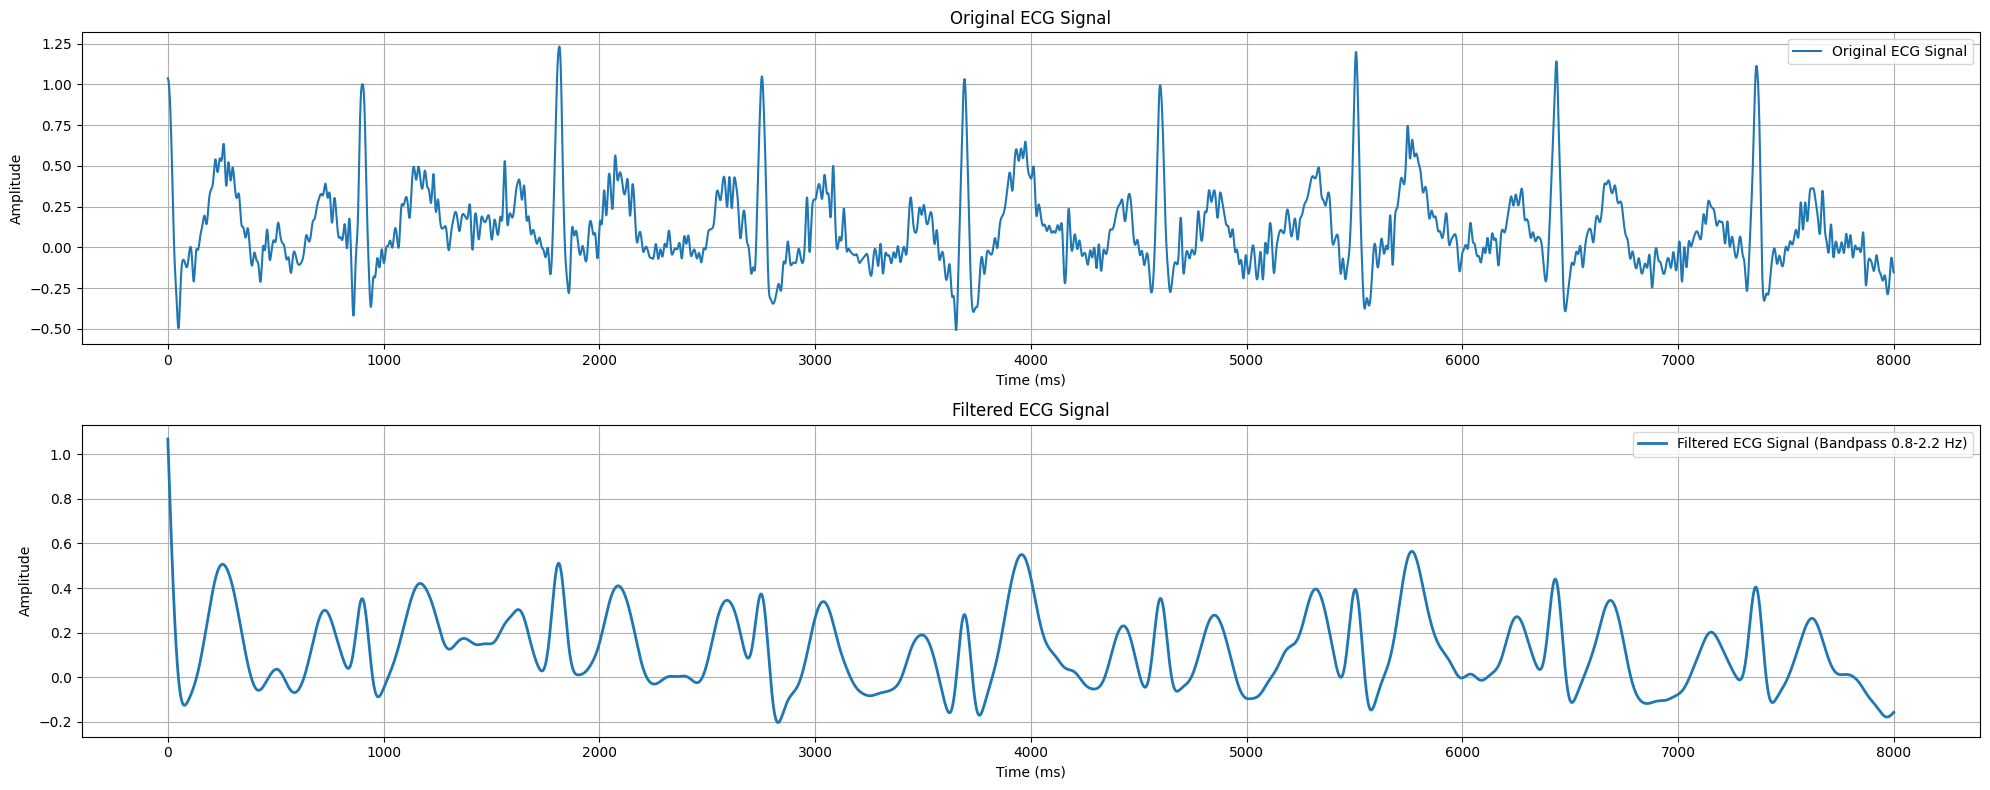

In [13]:
# Apply the filter to the ECG signal using lfilter
filtered_ecg_signal = filtfilt(fir_coefficients, 1.0, ecg_signal)

# Plotting the original and filtered signals
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))

# Plot original ECG signal
ax1.plot(ecg_signal, label="Original ECG Signal")
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Amplitude")
ax1.legend()
ax1.set_title("Original ECG Signal")
ax1.grid()

# Plot filtered ECG signal
ax2.plot(filtered_ecg_signal, label="Filtered ECG Signal (Bandpass 0.8-2.2 Hz)", linewidth=2)
ax2.set_xlabel("Time (ms)")
ax2.set_ylabel("Amplitude")
ax2.legend()
ax2.set_title("Filtered ECG Signal")
ax2.grid()
plt.tight_layout()
plt.show()

---
## Tugas: `ho2`

#### Instruksi:

1. Mengapa nyquist_rate dihitung sebagai `sampling_rate / 2`? Dan mengapa frekuensi cutoff (low dan high) dibagi dengan nyquist_rate?

2. Buatlah penjelasan tentang filter IIR:
    - Jelaskan apa itu IIR
    - Jelaskan bagaimana merancang filter IIR secara manual (tanpa menggunakan `scipy.signal`)
    - Lakukan eksperimen dengan membandingkan filter IIR yang dibuat secara manual Vs. menggunakan `scipy.signal`

3. Jelaskan karakteristik dari filter FIR dan IIR. Apa kelebihan dan kekurangan dari masing-masing filter?

4. Lakukan eksperimen berikut:
    - Buatlah sinyal ECG (jika nim anda Ganjil) atau Respiration Signal (jika nim anda Genap) dengan library `neurokit2`
    - Aturlah `noise = 0.2` untuk ECG atau `noise = 0.05` untuk Respiration Signal
    - Gunakan NIM anda sebagai random seed
    - Sampling rate dan durasi signal bebas
    - Lakukan komparasi antara filter FIR dan IIR pada sinyal yang telah dibuat. Gunakan `scipy.signal` untuk filter FIR dan IIR agar lebih mudah.
    - Lakukan cut off yang menurut anda paling baik untuk kedua filter tersebut dan jelaskan alasannya. (Pernah dibahas di kelas)


### Ketentuan Penamaan File
```
nim_ho2.ipynb
```

### Pengumpulan
- Unggah `.ipynb` ke repositori anda.
- Paste link dari file ke google form pengumpulan tugas
- Export `.ipynb` menjadi `.pdf` dan unggah juga ke google form

Link yang di paste harus mirip dengan format berikut:
```
https://github.com/<username>/<kode_mk>/blob/master/<nim_ho1>.ipynb
```

- *Pastikan repo anda bersifat privat dan anda telah mengundang dosen pengampu ke repositori anda*
- Seluruh tugas untuk ho1 digabung dalam satu file notebook `.ipynb`
- Berikan penjelasan yang sedetail-detailnya untuk setiap bagian eksperimen yang anda lakukan